In [7]:
from pyinterpolate.io.read_data import read_txt
import geopandas as gpd
from geopandas import points_from_xy

In [2]:
arr = read_txt('pl_dem.txt')

In [6]:
arr[0:2, :]

array([[15.1152409 , 52.74279035, 96.54829407],
       [15.1152409 , 52.71070647, 51.25455093]])

In [8]:
gdf = gpd.GeoDataFrame(arr, columns=['x', 'y', 'z'])

In [9]:
gdf.head()

,x,y,z
0,15.115241,52.742790,96.548294
1,15.115241,52.710706,51.254551
2,15.115241,52.708844,48.958282
3,15.115241,52.671378,16.817863
4,15.115241,52.649851,16.293905


In [10]:
gdf['geometry'] = points_from_xy(gdf.x, gdf.y, crs='epsg:4326')

In [11]:
gdf.geometry = gdf['geometry']

In [12]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

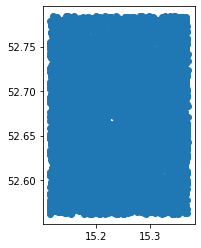

In [13]:
gdf.plot()

In [14]:
gdf.to_crs(epsg=2180, inplace=True)

In [15]:
gdf.crs

<Derived Projected CRS: EPSG:2180>
Name: ETRF2000-PL / CS92
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Poland - onshore and offshore.
- bounds: (14.14, 49.0, 24.15, 55.93)
Coordinate Operation:
- name: Poland CS92
- method: Transverse Mercator
Datum: ETRF2000 Poland
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

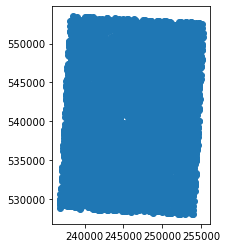

In [16]:
gdf.plot()

In [17]:
gdf = gdf[['geometry', 'z']]

In [18]:
gdf.head()

,geometry,z
0,POINT (237878.001 548982.351),96.548294
1,POINT (237685.325 545416.708),51.254551
2,POINT (237674.140 545209.671),48.958282
3,POINT (237449.255 541045.935),16.817863
4,POINT (237320.090 538653.518),16.293905


In [19]:
gdf['x'] = gdf.geometry.x

/home/szymon/miniconda3/envs/p310/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [20]:
gdf['y'] = gdf.geometry.y

In [21]:
gdf.head()

,geometry,z,x,y
0,POINT (237878.001 548982.351),96.548294,237878.001294,548982.351111
1,POINT (237685.325 545416.708),51.254551,237685.325393,545416.708315
2,POINT (237674.140 545209.671),48.958282,237674.140301,545209.671315
3,POINT (237449.255 541045.935),16.817863,237449.254870,541045.934750
4,POINT (237320.090 538653.518),16.293905,237320.089992,538653.518032


In [22]:
gdf = gdf[['x', 'y', 'z']].values

In [23]:
gdf[:10]

array([[2.37878001e+05, 5.48982351e+05, 9.65482941e+01],
       [2.37685325e+05, 5.45416708e+05, 5.12545509e+01],
       [2.37674140e+05, 5.45209671e+05, 4.89582825e+01],
       [2.37449255e+05, 5.41045935e+05, 1.68178635e+01],
       [2.37320090e+05, 5.38653518e+05, 1.62939053e+01],
       [2.37187238e+05, 5.36192094e+05, 1.65406628e+01],
       [2.37056908e+05, 5.33776683e+05, 1.94509335e+01],
       [2.37050703e+05, 5.33661664e+05, 1.92426758e+01],
       [2.36890637e+05, 5.30694166e+05, 4.56620102e+01],
       [2.36841016e+05, 5.29774013e+05, 3.37260437e+01]])

In [26]:
with open('pl_dem_epsg2180.txt', 'w') as fstream:
    for row in gdf:
        strings = [str(x) for x in row]
        srow = ','.join(strings) + '\n'
        fstream.write(srow)